### Data sets

**We use the following datasets:**

    - Monthly Fed interest rate from 1955 to 2022: https://fred.stlouisfed.org/series/FEDFUNDS
    - Monthly US unemployment rate from ? to 2022: https://data.bls.gov/pdq/SurveyOutputServlet
    - Monthly SP500 index: https://www.wsj.com/market-data/quotes/index/SPX/historical-prices
    - Weekly/Monthly NASDAX index: https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC
    - Weekly/Monthly Bitcoin: https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

In [7]:
import pandas as pd

### US Fed interest rate

In [23]:
fed_df = pd.read_csv("../data/economy/fed_rate.csv")
fed_df.shape

(818, 2)

In [24]:
fed_df.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


### US unemployment rate

In [40]:
uem_df = pd.read_csv("../data/economy/unemployment_rate.csv")
uem_df.shape

(75, 13)

In [41]:
uem_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7


In [50]:
uem_df.columns[1:]

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [54]:
mapping = {mon:num for mon, num in zip(uem_df.columns[1:], range(1,13))}

In [58]:
uem_df = uem_df.melt(id_vars='Year').rename(columns={"variable":"Month", "value":"unemployment"})
uem_df["Month_Num"] = uem_df["Month"].map(mapping)
uem_df.head()

,Year,Month,unemployment,Month_Num
0,1948,Jan,3.4,1
1,1949,Jan,4.3,1
2,1950,Jan,6.5,1
3,1951,Jan,3.7,1
4,1952,Jan,3.2,1


In [63]:
uem_df["Date"] = uem_df["Year"].astype(str) + "-" + uem_df["Month_Num"].astype(str) + "-" + "01"

In [64]:
uem_df

,Year,Month,unemployment,Month_Num,Date
0,1948,Jan,3.4,1,1948-1-01
1,1949,Jan,4.3,1,1949-1-01
2,1950,Jan,6.5,1,1950-1-01
3,1951,Jan,3.7,1,1951-1-01
4,1952,Jan,3.2,1,1952-1-01
...,...,...,...,...,...
895,2018,Dec,3.9,12,2018-12-01
896,2019,Dec,3.6,12,2019-12-01
897,2020,Dec,6.7,12,2020-12-01
898,2021,Dec,3.9,12,2021-12-01


### S&P500 index

In [11]:
sp5_df = pd.read_csv("../data/economy/sp500.csv")
sp5_df.shape

(11276, 5)

In [12]:
sp5_df.head()

,Date,Open,High,Low,Close
0,09/20/22,3875.05,3876.01,3827.54,3855.93
1,09/19/22,3849.91,3900.45,3838.50,3899.89
2,09/16/22,3880.95,3880.95,3837.08,3873.33
3,09/15/22,3932.41,3959.14,3888.28,3901.35
4,09/14/22,3940.73,3961.94,3912.18,3946.01


In [28]:
sp5_df.tail()

,Date,Open,High,Low,Close
11271,01/09/78,90.64,91.52,90.01,90.64
11272,01/06/78,91.62,92.66,91.05,91.62
11273,01/05/78,92.74,94.53,92.51,92.74
11274,01/04/78,93.52,94.10,93.16,93.52
11275,01/03/78,93.82,95.15,93.49,93.82


In [30]:
sp5_df.isna().sum()

Date      0
 Open     0
 High     0
 Low      0
 Close    0
dtype: int64

In [34]:
sp5_df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [35]:
# 2022-40
sp5_df["Price"] = (sp5_df[" Close"] - sp5_df[" Close"].mean()) / sp5_df[" Close"].std()

### NASDAX index

In [16]:
ndq_df = pd.read_csv(".../data/economy/nasdaq.csv")
ndq_df.shape

(2695, 7)

In [17]:
ndq_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,102.050003,100.690002,102.050003,102.050003,0
2,1971-02-15,102.190002,102.190002,100.699997,100.699997,100.699997,0
3,1971-02-22,99.680000,101.339996,99.680000,101.339996,101.339996,0
4,1971-03-01,101.779999,103.000000,101.779999,103.000000,103.000000,0


In [21]:
ndq_df["Price"] = (ndq_df["Adj Close"] - ndq_df["Adj Close"].mean() ) / ndq_df["Adj Close"].std()

In [18]:
ndq_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2690,2022-08-22,12523.160156,12655.839844,12141.519531,12141.709961,12141.709961,20755470000
2691,2022-08-29,12021.049805,12124.870117,11546.519531,11630.860352,11630.860352,22776260000
2692,2022-09-05,11643.030273,12132.669922,11471.500000,12112.309570,12112.309570,17800080000
2693,2022-09-12,12174.940430,12270.190430,11316.919922,11448.400391,11448.400391,26454340000
2694,2022-09-19,11338.570313,11538.129883,11337.830078,11535.019531,11535.019531,4168670000


<AxesSubplot:xlabel='Date'>

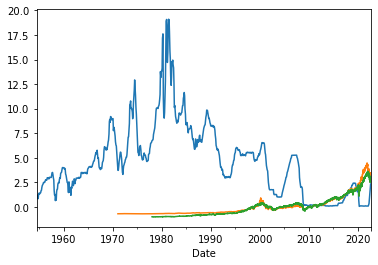

In [36]:
fed_df.set_index(pd.to_datetime(fed_df.DATE))["FEDFUNDS"].plot()
ndq_df.set_index(pd.to_datetime(ndq_df.Date))["Price"].plot()
sp5_df.set_index(pd.to_datetime(sp5_df.Date))["Price"].plot()

### Bitcoin USD

In [45]:
btc_df = pd.read_csv("../data/economy/btc_usd.csv")
btc_df.shape

(420, 7)

In [46]:
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-15,465.864014,468.174011,384.532013,398.821014,398.821014,156903400
1,2014-09-22,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2,2014-09-29,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
3,2014-10-06,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
4,2014-10-13,377.920990,411.697998,368.897003,389.545990,389.545990,156902070


In [47]:
btc_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
415,2022-08-29,19615.154297,20542.644531,19600.785156,19986.712891,19986.712891,208511390280
416,2022-09-05,19988.789063,21770.552734,18644.466797,21769.255859,21769.255859,259528892947
417,2022-09-12,21770.148438,22673.820313,19387.492188,19419.505859,19419.505859,261900187496
418,2022-09-19,19418.572266,19639.480469,18390.318359,18890.789063,18890.789063,76968349132
419,2022-09-21,18883.615234,19031.361328,18883.615234,18988.322266,18988.322266,34801786880
